In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_excel(r"C:\Users\Susmi\OneDrive\Desktop\Crop file.xlsx")

df = df.drop_duplicates()
df = df.dropna()

df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # for possible decoding later

X = df_encoded.drop('Production', axis=1)
y = df_encoded['Production']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Linear Regression Results:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")


 Linear Regression Results:
Mean Squared Error: 768.95
R² Score: 0.5369


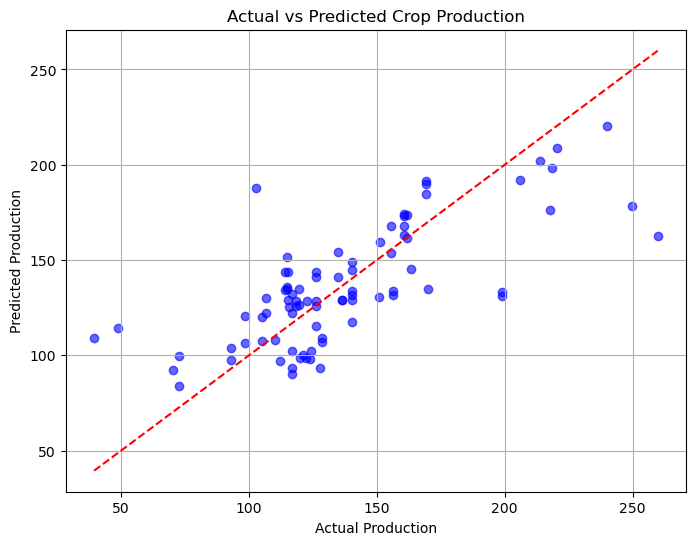

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Actual vs Predicted Crop Production')
plt.grid(True)
plt.show()


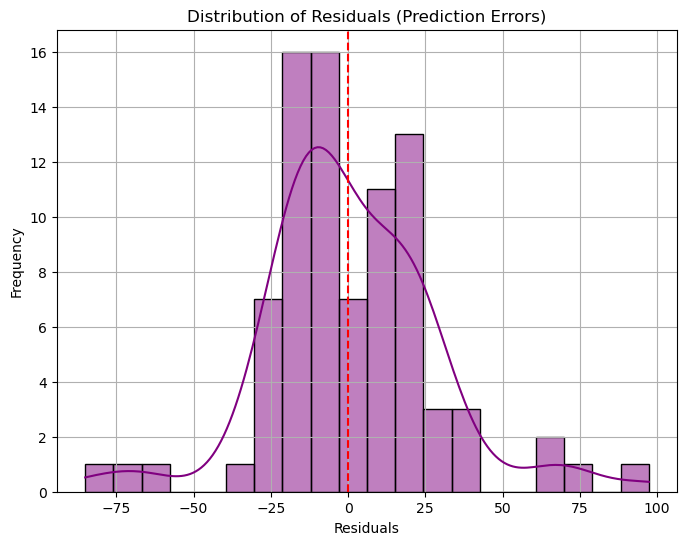

In [3]:

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True, color='purple')
plt.title('Distribution of Residuals (Prediction Errors)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--')
plt.grid(True)
plt.show()
